<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/digital_terrain_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Terrain Analysis


Zia Ahmed, University at Buffalo

Digital Terrain Analysis (DTA) is a set of techniques and methods used to extract valuable information from digital terrain models (DTMs) or elevation data. It involves the application of spatial analysis and geographic information systems (GIS) tools to study and interpret the characteristics, patterns, and relationships within the terrain. DTA is widely used in various fields, including geography, environmental science, geology, engineering, and land management.

Here are some common aspects of digital terrain analysis:

1.  **Slope Analysis:** Slope refers to the steepness of the terrain at a particular location. Slope analysis involves calculating the gradient of the terrain surface. Steep slopes can impact erosion, landslides, and accessibility.

2.  **Aspect Analysis:** Aspect refers to the direction a slope faces. It's measured in degrees from north. Aspect analysis is important for understanding factors like solar radiation, vegetation distribution, and water flow.

3.  **Elevation Profile:** Elevation profiles show the change in elevation along a specific line or path. They are useful for understanding changes in elevation and planning routes for various purposes.

4.  **Viewshed Analysis:** Viewshed analysis determines the areas visible from a specific location. It's often used in urban planning to analyze the visual impact of developments or in archaeological studies to assess the visibility of historical sites.

5.  **Hillshade Mapping:** Hillshade maps use lighting and shadow to create a visual representation of the terrain's relief. This can help in understanding the topography and spatial relationships within the landscape.

6.  **Hydrological Analysis:** This involves studying the flow of water across the terrain, including the identification of drainage patterns, watershed boundaries, and flow accumulation.

7.  **Terrain Classification:** Classifying the terrain into different categories can provide insights into land cover, land use, and soil types. This is crucial for various applications, such as environmental monitoring and urban planning.

8.  **Landform Analysis:** Identifying and characterizing different landforms, such as valleys, ridges, and plains, helps in understanding the natural landscape and geological processes.

9.  **Slope Stability Analysis:** DTA can be used to assess the stability of slopes and potential landslide-prone areas by analyzing factors such as slope angle, terrain roughness, and soil characteristics.

10. **Interpolation and Contouring:** These techniques are used to create continuous surfaces from discrete elevation points, enabling visualization of the terrain's features through contour lines or smooth visualizations.

11. **Geomorphic Analysis:** Geomorphology studies the formation and evolution of landforms. DTA can provide insights into the processes that shape the terrain, such as erosion, deposition, and tectonic activity.

12. **Multi-Criteria Decision Analysis (MCDA):** DTA can be combined with other spatial data to support decision-making processes. MCDA techniques help evaluate various criteria and factors when making complex decisions related to land use, resource allocation, and more.

Digital Terrain Analysis is a versatile toolset that helps professionals and researchers gain a deeper understanding of the landscape, make informed decisions, and develop solutions for various challenges related to terrain and land management.


In this exercise will cover follow topics:

         
-   Slope

-   Aspect

-   Hillshade

-   Terrain Ruggedness Index

-   Topographic Position Index

-   Roughness

-   Curvature

-   Flow Direction

### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314929 sha256=e464408eea6f5add9766ba0dc8f5dccda98ab6f3104b7921b96d4ca2b6e9c5a9
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Package

In [ ]:
%%R
install.packages(c('rgdal','maptools', 'raster', 'sf',
                   'rgeos' 'tidyverse', 'terra', 'devtools',
                   'classInt', 'RColorBrewer', 'spatialEco', 'gridExtra', 'rasterVis', lib='drive/My Drive/R/')

### Load Packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
library (terra)
library(sf)
library (rgdal)
library(tidyverse)
library(rgeos)
library(maptools)
library(classInt)
library(RColorBrewer)
library(raster)
library(spatialEco)
library(gridExtra)
library(rasterVis)






### Data

We will use 30 M SRTM elevation one small area in Bandarban district, Bangladesh and the data can be found [here](https://github.com/zia207/r-colab/tree/main/Data/) for download.


In [4]:
%%R
aoi<- st_read("/vsicurl/https://github.com/zia207/r-colab/raw/main/Data/Bangladesh/Shapefiles/aoi_dtm.shp")
hilly_dem<-terra::rast("/vsicurl/https://github.com/zia207/r-colab/raw/main/Data/Bangladesh/Raster//hilly_dem_BTM.tiff")

Reading layer `aoi_dtm' from data source 
  `/vsicurl/https://github.com/zia207/r-colab/raw/main/Data/Bangladesh/Shapefiles/aoi_dtm.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 1 field
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 723409.3 ymin: 401962.1 xmax: 764367.5 ymax: 444399.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


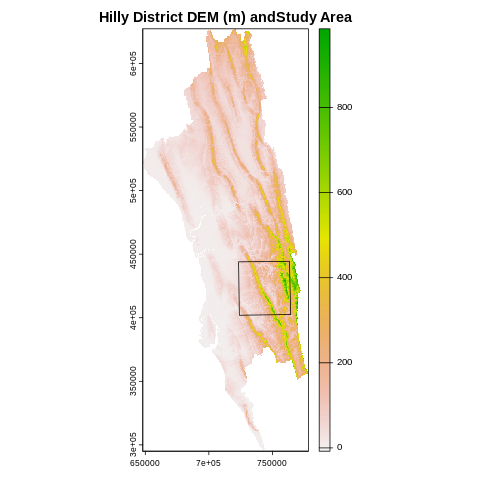

In [5]:
%%R
plot(hilly_dem, main="Hilly District DEM (m) andStudy Area")
plot(aoi$geometry, add=TRUE)

We can load data from github:

In [6]:
%%R
dem= terra::rast("/vsicurl/https://github.com/zia207/r-colab/raw/main/Data/Bangladesh/Raster/aoi_dtm_dem_BTM.tif")
dem

class       : SpatRaster 
dimensions  : 1378, 1448, 1  (nrow, ncol, nlyr)
resolution  : 28.3, 30.80041  (x, y)
extent      : 723394.3, 764372.7, 401963.6, 444406.6  (xmin, xmax, ymin, ymax)
coord. ref. : WGS_1984_Transverse_Mercator 
source      : aoi_dtm_dem_BTM.tif 
name        :      Band_1 
min value   :   0.3669947 
max value   : 975.8804321 


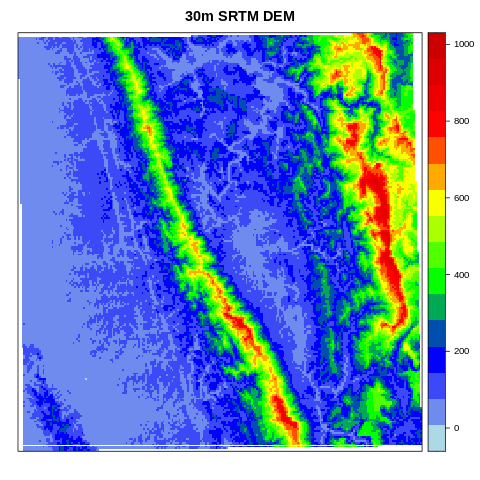

In [7]:
%%R
rgb.palette <- colorRampPalette(c('lightblue',"blue","green","yellow","red", "red3"),
space = "rgb")
spplot(dem,  main="30m SRTM DEM", col.regions=rgb.palette(100))

### Slope

Slope is a fundamental concept in terrain analysis that refers to the steepness or inclination of the Earth's surface at a specific location. It is a measure of how rapidly the elevation changes as you move horizontally across the landscape. Slope is an important factor in various fields such as geography, geology, engineering, hydrology, and environmental science. It plays a critical role in understanding terrain characteristics, land use planning, and natural processes.

Slope is typically expressed as a ratio, a percentage, or an angle. Here's how each representation works:

1.  **Slope Ratio:** The slope ratio is the vertical change in elevation (rise) divided by the horizontal distance (run) between two points on the terrain. It is often expressed as a fraction, such as 1:2 (1 unit rise for every 2 units of run).

2.  **Slope Percentage:** The slope percentage is the ratio of the vertical change in elevation to the horizontal distance, expressed as a percentage. For example, a slope of 25% means that for every 100 units of horizontal distance, the elevation changes by 25 units.

3.  **Slope Angle:** The slope angle is the angle formed between the horizontal plane and the slope surface. It's usually measured in degrees. A slope angle of 30 degrees means that the terrain rises 30 degrees above the horizontal.

The formula for calculating slope depends on the representation being used:

-   **Slope Ratio:** Slope = Rise / Run

-   **Slope Percentage:** Slope (%) = (Rise / Run) \* 100

-   **Slope Angle:** Slope (degrees) = arctan(Rise / Run)

In all cases, "Rise" represents the change in elevation between two points, and "Run" represents the horizontal distance between those points.

Slope analysis is crucial for various applications:

-   **Erosion and Sediment Control:** Steeper slopes are more prone to erosion. Studying slope angles helps in managing soil erosion and sediment movement.

-   **Land Use Planning:** Slope analysis is used to determine suitable areas for construction, agriculture, and infrastructure development.

-   **Hydrology:** Slope influences the flow of water across the landscape. It's a key factor in determining drainage patterns and runoff.

-   **Geological Studies:** Geologists analyze slope angles to understand rock stability, landslides, and geological formations.

-   **Environmental Management:** Slope analysis is important for assessing the impact of land use changes on ecosystems and habitats.

-   **Transportation Planning:** Slope analysis helps in designing roads, railways, and other transportation infrastructure by considering safe and efficient gradients.

Digital terrain models and geographic information systems (GIS) play a significant role in performing slope analysis. By analyzing elevation data, you can create slope maps, visualize slope distribution, and make informed decisions based on the terrain's steepness characteristics.

The **terrain(v="slope")** function from the terra package will create a raster of slope angle.

In [8]:
%%R
slope_angle <- terra::terrain(dem,			# raster DEM
	v="slope",				        # Slope function
	unit='degrees')

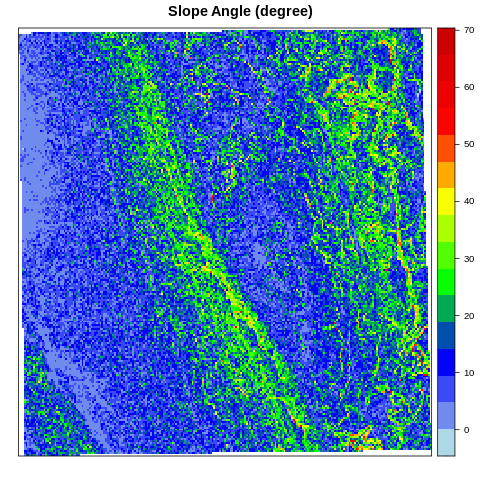

In [9]:
%%R
spplot(slope_angle ,
     main= "Slope Angle (degree)",
     col.regions=rgb.palette(100))

Slope percentage is related to the vertical rise and horizontal run of the slope. As the angle approaches 90 degrees, the slope percentage approaches infinity. Do not confuse this percent measure with the percent we use to measure angles.

The slope (in degrees) is the tangent of the angle of slope. Tangent equals rise/run. So at the 90 degrees, the tangent does not exist because tan(90) = rise/run = x/0. This is the equitation for slope 30°: tan(30) = app. 0.58 = 1:1.72. The formula to convert slope degrees to slope percentage is Tan(θ)\*100.

In [11]:
%%R
slope_percent<-tan(3.141593/360*slope_angle)*100

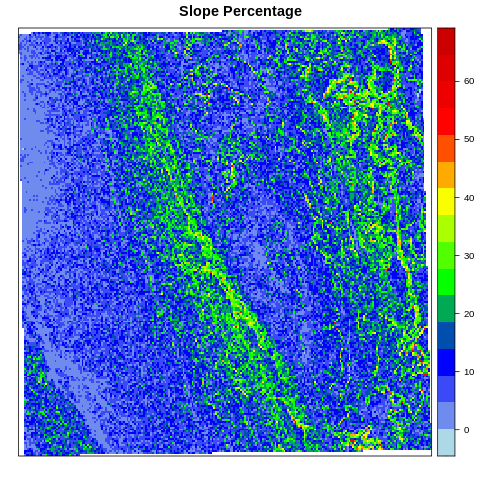

In [12]:
%%R
spplot(slope_percent, main = "Slope Percentage",
       col.regions=rgb.palette(100))

### Aspect

Aspect is another important concept in terrain analysis, closely related to slope. While slope describes the steepness of the terrain, aspect refers to the direction in which a slope faces. Specifically, it's the compass direction (measured in degrees) toward which a slope points. Aspect provides valuable information about the exposure of a slope to various factors such as sunlight, wind, and water flow.

Aspect is measured in degrees clockwise from north, ranging from 0° (north) to 360° (back to north). Here are some key aspects:

-   **North (0°):** Slopes facing north receive less direct sunlight, which can impact factors such as vegetation growth, snow accumulation, and temperature distribution.

-   **East (90°):** Eastern slopes receive morning sunlight and are often warmer in the early hours. They might be more suitable for crops that benefit from morning sunlight.

-   **South (180°):** South-facing slopes receive the most direct sunlight in the Northern Hemisphere. These slopes tend to be warmer and drier and can be ideal for vegetation that requires warmth.

-   **West (270°):** Western slopes receive afternoon sunlight. They are warmer in the late afternoon and evening and might be suitable for certain types of plants.

Aspect analysis has several practical applications:

1.  **Solar Radiation:** Aspect plays a significant role in understanding solar radiation distribution. South-facing slopes receive more sunlight and are warmer, while north-facing slopes receive less sunlight and are cooler.

2.  **Vegetation and Ecosystems:** Aspect affects vegetation growth. Different plant species might prefer different aspects due to variations in sunlight and temperature.

3.  **Snow Accumulation and Melting:** South-facing slopes experience earlier snowmelt due to increased sun exposure, while north-facing slopes retain snow for longer.

4.  **Hydrology:** Aspect influences water flow patterns. Snowmelt and rainfall runoff tend to be greater on south-facing slopes, impacting hydrological processes.

5.  **Erosion and Soil Moisture:** Aspect affects soil moisture distribution, which in turn influences erosion patterns and soil characteristics.

6.  **Wildlife Habitat:** Aspect can influence wildlife habitat suitability, as animals might prefer specific aspects for shelter and thermoregulation.

7.  **Land Use Planning:** Understanding aspect helps in determining suitable land uses for agriculture, forestry, and urban planning.

Aspect analysis is often combined with slope analysis to provide a more comprehensive understanding of the terrain. Geographic Information Systems (GIS) and digital terrain models (DTMs) are commonly used to perform aspect calculations and create aspect maps, which visually represent the directional characteristics of the landscape.

The **terrain(v="aspect")** function from the terra package will create an aspect raster .

In [13]:
%%R
aspect <- terra::terrain(dem,		  #  raster DEM
	v="aspect",			            #  aspect function
	unit='degrees')

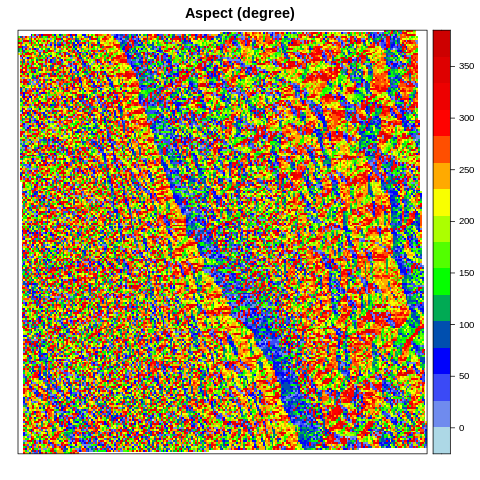

In [14]:
%%R
spplot(aspect,
       main= "Aspect (degree)",
       col.regions=rgb.palette(100))

### Hillshade

Hillshade is a technique used in cartography and geographic information systems (GIS) to create visually realistic representations of terrain relief by simulating the effects of illumination and shadows. It provides a sense of three-dimensionality to two-dimensional maps, helping viewers better understand the topography and spatial relationships within the landscape.

Hillshade is commonly used to enhance the visualization of digital elevation models (DEMs), digital terrain models (DTMs), or other elevation data. It mimics the way light interacts with the terrain, casting shadows on slopes and highlighting the elevation variations. This technique is particularly useful in creating visually appealing and informative maps for a variety of applications, including land use planning, environmental

Here's how the hillshade technique works:

1.  **Illumination Angle:** A specific angle of illumination is chosen to simulate the position of the sun. This angle determines the direction from which the light source is coming. Common angles are around 45 to 60 degrees, as they provide a good balance between highlighting features and maintaining a natural appearance.

2.  **Slope and Aspect Calculation:** The slope and aspect of each pixel in the elevation dataset are calculated. Slope describes how steep the terrain is at that point, while aspect indicates the direction the slope is facing.

3.  **Shading Calculation:** Using the calculated slope and aspect, the amount of light that reaches each pixel is determined. Pixels that are facing away from the light source (such as the northern side of a slope when the light comes from the south) will be shaded, creating the appearance of shadows.

4.  **Shading Grayscale:** The shaded values are typically represented in grayscale, with lighter tones indicating areas that receive more light and are thus illuminated, and darker tones representing areas in shadow.

By applying the hillshade technique to elevation data, cartographers and GIS professionals can create maps that effectively convey the topographic features of the landscape. The resulting maps show valleys, ridges, slopes, and other terrain variations in a way that closely resembles how we perceive them in the real world under different lighting conditions.

Hillshade maps are often combined with other map layers, such as land cover, water bodies, and infrastructure, to create informative and visually appealing representations that aid in decision-making, analysis, and communication of geographical information.

We generate a hill shade layer from slope and aspect layers (both in radians). Slope and aspect can be computed with **terrain() function.** A hill shade layer is often used as a backdrop on top of which another, semi-transparent, layer is drawn.

In [15]:
%%R
slope <- terrain(dem, "slope", unit="radians")
aspect <- terrain(dem, "aspect", unit="radians")
hill <- shade(slope, aspect, 40, 270)

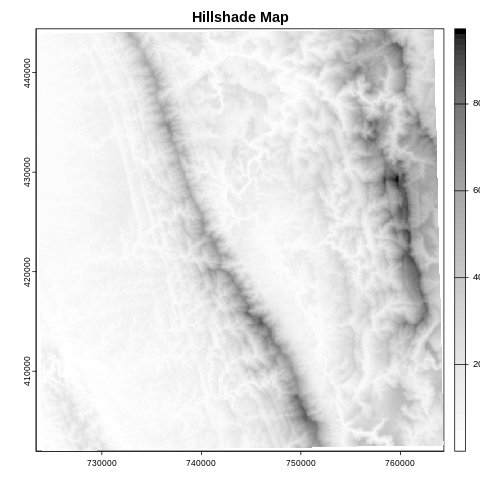

In [16]:
%%R
plot(hill,col = gray.colors(20, start =1, end = 0), legend=FALSE, main='Hillshade Map')
plot(dem, col = gray.colors(80, start =1, end = 0), add=TRUE)

### Terrain Ruggedness Index (TRI)

TRI (Terrain Ruggedness Index) is the mean of the absolute differences between the value of a cell and its surrounding cells (the amount of elevation difference between adjacent cells of a DEM). It provides a relative measure of elevation changes between a specified grid cell and neighbors. It provides information about the variability of elevation within a specific area, allowing for the characterization of terrain complexity and heterogeneity. The TRI is particularly useful for landscape analysis, ecological modeling, and understanding terrain features that might influence various natural processes.

Here's how the calculation is generally performed:

1.  **Select Window Size:** A predefined window size is chosen, typically in terms of the number of neighboring cells. Common window sizes range from 3x3 to 9x9 cells.

2.  **Calculate Elevation Difference:** For each cell in the DEM, the elevation difference between the central cell and its neighboring cells within the window is calculated. These elevation differences can be absolute values or squared values, depending on the application.

3.  **Sum or Average Elevation Differences:** The calculated elevation differences are then summed or averaged, depending on the methodology used.

4.  **Normalize the Index:** The sum or average of elevation differences is often divided by the number of neighboring cells to normalize the index and make it comparable across different window sizes.

The formula for calculating the Terrain Ruggedness Index (TRI) can vary slightly depending on the specific implementation and normalization method. One common formula is:

TRI = Σ \|z_i - z_c\| / n

Where:

-   z_i is the elevation of the neighboring cell.

-   z_c is the elevation of the central cell.

-   n is the number of neighboring cells.

The resulting TRI value provides an indication of the variability of elevation within the specified window. Higher TRI values indicate greater terrain ruggedness, as they reflect larger elevation differences among neighboring cells. Lower TRI values suggest smoother and flatter terrain.

Applications of the Terrain Ruggedness Index include:

-   **Ecological Studies:** TRI is used to assess habitat diversity, wildlife movement patterns, and habitat suitability for various species.

-   **Geomorphological Analysis:** TRI helps in identifying areas with significant topographic variations, such as valleys, ridges, and peaks.

-   **Landscape Characterization:** It provides valuable information for land classification and landform analysis.

-   **Environmental Modeling:** TRI can be used as an input for modeling erosion, sediment transport, and hydrological processes.

-   **Hiking and Outdoor Activities:** It aids in route planning for hiking, biking, and other outdoor recreational activities.

Overall, the Terrain Ruggedness Index is a useful tool for quantifying and analyzing the topographic variability of landscapes, providing insights into their complexity and natural characteristics.

The **terrain(v="TRI")** function from the terra package will create a TRI.

In [17]:
%%R
TRI<- terrain(dem,		    #  raster DEM
	v="TRI",                  #  TRI function
	unit='degrees')

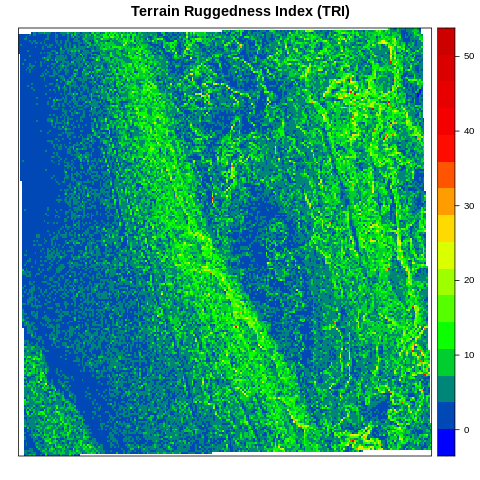

In [18]:
%%R
rgb.palette <- colorRampPalette(c("blue","green","yellow","red", "red3"),
space = "rgb")
spplot(TRI,
       main= "Terrain Ruggedness Index (TRI)",
       col.regions=rgb.palette(100))

### Topographic Position Index (TPI)

The Topographic Position Index (TPI) is a terrain analysis technique used to assess the relative position of a cell within its surrounding landscape. It provides information about whether a cell is located in a depression, on a ridge, or within a flat area. TPI is particularly useful for understanding the local topographic context of a location and can be valuable for various applications, such as hydrology, landform classification, and ecological studies.

TPI calculates the difference between the elevation of a central cell and the average elevation of its neighboring cells within a defined radius. The resulting value indicates whether the central cell is lower, higher, or at the same elevation level as its surroundings. Positive TPI values indicate that the central cell is higher than its surroundings (e.g., on a ridge), negative values indicate that it's lower (e.g., in a depression), and values close to zero suggest that it's within a relatively flat area.

Here's how the Topographic Position Index is calculated:

1.  **Select Neighborhood:** A circular or square window with a specified radius or size is defined around the central cell.

2.  **Calculate Average Elevation:** The average elevation of the neighboring cells within the defined window is calculated.

3.  **Calculate TPI:** The difference between the elevation of the central cell and the calculated average elevation is the TPI value.

Mathematically, the TPI calculation can be expressed as:

TPI = z_c - (Σ z_i / n)

Where:

-   z_c is the elevation of the central cell.

-   z_i is the elevation of each neighboring cell within the window.

-   n is the number of neighboring cells.

The TPI value helps classify the topographic context of the cell:

-   Positive TPI values (\> 0): The central cell is higher than its surroundings, suggesting a ridge or elevated position.

-   Negative TPI values (\< 0): The central cell is lower than its surroundings, indicating a depression or low point.

-   TPI values close to zero: The central cell is in a relatively flat or even terrain.

Applications of the Topographic Position Index include:

-   **Hydrological Studies:** TPI can help identify potential drainage areas, flow paths, and watershed boundaries.

-   **Ecological Analysis:** TPI is used to understand habitat variations, plant species distributions, and wildlife movement patterns.

-   **Geomorphological Studies:** TPI aids in classifying landforms and characterizing landscape features.

-   **Soil Science:** It provides insights into soil moisture patterns and potential water accumulation areas.

TPI is a valuable tool for analyzing terrain characteristics at a local scale and can be combined with other terrain analysis techniques to gain a comprehensive understanding of the landscape.

In [19]:
%%R
TPI<- terrain(dem, 	v="TPI",	unit="degrees")

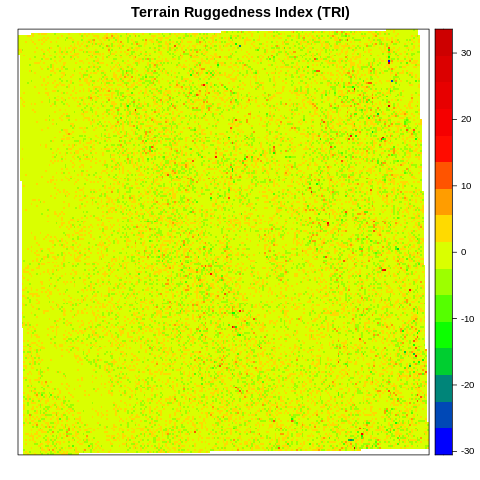

In [20]:
%%R
rgb.palette <- colorRampPalette(c("blue","green","yellow","red", "red3"), space = "rgb")
spplot(TPI,
       main= "Terrain Ruggedness Index (TRI)",
       col.regions=rgb.palette(100))

We use following [function](https://rpubs.com/ials3/dem1) to calculate TPI using 3x3, 5X5 9X9 and 15x15 windows.

In [21]:
%%R
tpiw <- function(x, w) {
    m <- matrix(1/(w^2-1), nc=w, nr=w)
    m[ceiling(0.5 * length(m))] <- 0
    f <- focal(x, m)
    x - f
}

In [22]:
%%R
TPI_3<- tpiw(dem, w=5)
p1=spplot(TPI_3,
        main= "TPI 3 x 3 windows",
        col.regions=rgb.palette(100))

TPI_15<- tpiw(dem, w=15)
p2=spplot(TPI_15,
        main= "TPI 15 x 15 windows",
        col.regions=rgb.palette(100))

TPI_25<- tpiw(dem, w=25)
p3=spplot(TPI_25,
        main= "TPI 25 x 25 windows",
        col.regions=rgb.palette(100))

TPI_35<- tpiw(dem, w=35)
p4=spplot(TPI_35,
        main= "TPI 35 x 35 windows",
        col.regions=rgb.palette(100))

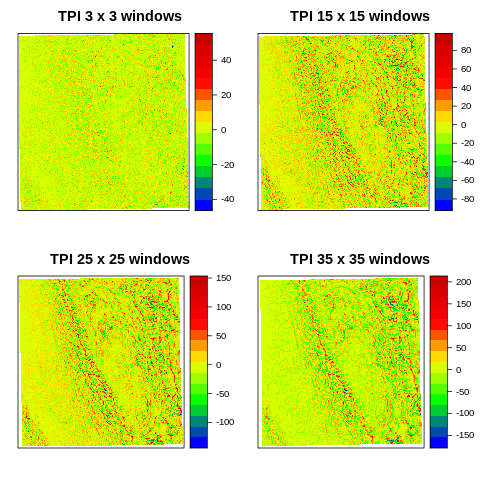

In [24]:
%%R
gridExtra::grid.arrange(p1,p2,p3,p4, ncol=2, nrow=2 )

### Roughness

Roughness, in the context of terrain analysis, refers to the unevenness or irregularity of the Earth's surface. It is a measure of how much the elevation varies within a certain area. Rough terrain exhibits significant changes in elevation over short distances, while smoother terrain has more gradual changes.

There are various methods to quantify and describe terrain roughness, each with its own application and focus. Here are a few common ways to measure and express roughness:

1.  **Standard Deviation of Elevation:** This method calculates the standard deviation of elevation values within a specified area. A higher standard deviation indicates greater elevation variability and roughness.

2.  **Root Mean Square (RMS) of Slope:** RMS slope measures the average steepness of the terrain. It calculates the square root of the mean of squared slope values within a given area. Higher RMS slope values indicate rougher terrain.

3.  **Variance of Slope:** Variance measures the variability of slope values within a specified area. Larger variance values indicate more irregular terrain.

4.  **Range of Elevation:** This is the difference between the maximum and minimum elevation values within a certain area. A larger range indicates greater elevation differences and rougher terrain.

5.  **Texture Analysis:** Techniques from image processing and remote sensing can be applied to terrain data to extract texture measures, which indicate the spatial patterns of elevation changes.

6.  **Fractal Dimension:** Fractal analysis assesses the complexity of terrain by measuring how its characteristics change with scale. A higher fractal dimension implies rougher and more intricate terrain.

Roughness analysis has a range of applications:

-   **Geomorphology:** Roughness measures help in characterizing landforms, identifying ridges, valleys, and other topographic features.

-   **Engineering:** Roughness is important for designing roads, railways, and other infrastructure, as smoother terrain is generally easier to build on.

-   **Environmental Studies:** Roughness affects hydrological processes, erosion, and sediment transport, influencing water flow patterns and soil erosion rates.

-   **Ecology:** Terrain roughness can impact habitat suitability for different plant and animal species, influencing biodiversity and species distributions.

-   **Land Use Planning:** Identifying rough and smooth areas helps planners allocate land for various purposes, considering factors like accessibility and environmental impact.

Roughness analysis is often carried out using geographic information systems (GIS) and digital elevation models (DEMs) or digital terrain models (DTMs). It provides valuable insights into the variability and complexity of landscapes, aiding decision-making in various fields..

In [25]:
%%R
ROUGH<- terrain(dem,		  # raster DEM
	v="roughness",            #  roughness function
	unit='degrees')

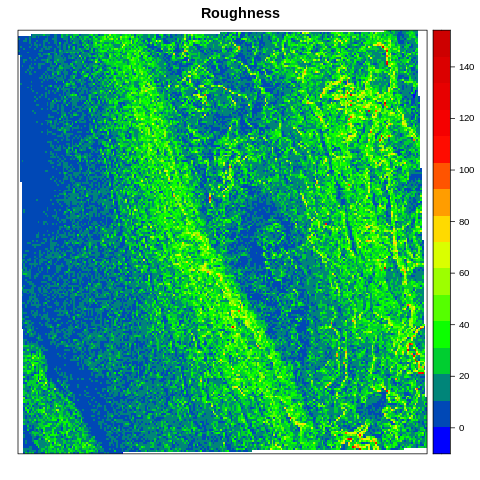

In [26]:
%%R
spplot(ROUGH,
     main= "Roughness",
     col.regions=rgb.palette(100))

### Curvature

Curvature, in the context of terrain analysis, refers to the rate of change of slope or the change in slope along a surface. It provides information about the concavity or convexity of the terrain at a specific location. Curvature analysis helps in understanding the local shape of the landscape and can provide insights into landforms, erosion patterns, and hydrological behavior.

There are two main types of curvature:

1.  **Profile Curvature:** Profile curvature, also known as longitudinal curvature, refers to the curvature along the direction of the steepest slope. It indicates whether the terrain is concave (bowl-shaped) or convex (ridge-shaped) when viewed along the slope direction.

2.  **Plan Curvature:** Plan curvature, also known as cross-sectional curvature, is the curvature along the contour lines of the terrain. It describes whether the terrain is concave or convex when viewed perpendicular to the slope direction.

Curvature values are calculated based on the second derivatives of the elevation surface. The second derivative measures how the slope changes with respect to the location. Positive curvature indicates convex terrain (hill-like), while negative curvature indicates concave terrain (depression-like).

Curvature can be classified into different categories:

-   **Positive Profile Curvature and Positive Plan Curvature:** This indicates a ridge-like feature, where the terrain is elevated along both the slope and contour directions.

-   **Negative Profile Curvature and Negative Plan Curvature:** This indicates a valley-like feature, where the terrain is depressed along both directions.

-   **Positive Profile Curvature and Negative Plan Curvature:** This indicates a slope that is steeper at the top and flatter at the bottom, forming a bowl-like shape.

-   **Negative Profile Curvature and Positive Plan Curvature:** This indicates a slope that is gentler at the top and steeper at the bottom, forming a convex shape.

Curvature analysis has several applications:

-   **Geomorphology:** Curvature analysis helps identify landforms such as ridges, valleys, and saddles.

-   **Erosion Studies:** It provides insights into erosion patterns, as different curvatures can influence water flow and sediment transport.

-   **Hydrology:** Curvature affects the direction and intensity of water flow across the landscape.

-   **Soil Science:** Curvature influences soil accumulation and erosion, impacting soil moisture and fertility.

Curvature analysis is performed using geographic information systems (GIS) and elevation data, often derived from digital elevation models (DEMs) or digital terrain models (DTMs). It's a valuable tool for understanding the shape and morphology of the terrain at a local scale.

The **spatialEco** package allows to calculate of several variants of the surface curvature (concavity/convexity) index. The planform and profile curvatures are the second derivative(s) of the elevation surface, or the slope of the slope. Profile curvature is in the direction of the maximum slope, and the planform curvature is perpendicular to the direction of the maximum slope. Negative values in the profile curvature indicate the surface is upwardly convex whereas positive values indicate that the surface is upwardly concave. Positive values in the planform curvature indicate and that the surface is laterally convex, whereas, negative values indicate that the surface is laterally concave.

Total curvature is the sigma of the profile and planform curvatures. A value of 0 in profile, planform r total curvature, indicates the surface is flat. The planform, profile and total curvatures are derived using Zevenbergen & Thorne (1987) via a quadratic equation fit to eight neighbors as such, the s (focal window size) argument is ignored.

In [27]:
%%R
profile.crv <- curvature(dem, type="profile")
# planform curvature
planform.crv <- curvature(dem, type="planform")
# total curvature
total.crv <- curvature(dem, type="total")

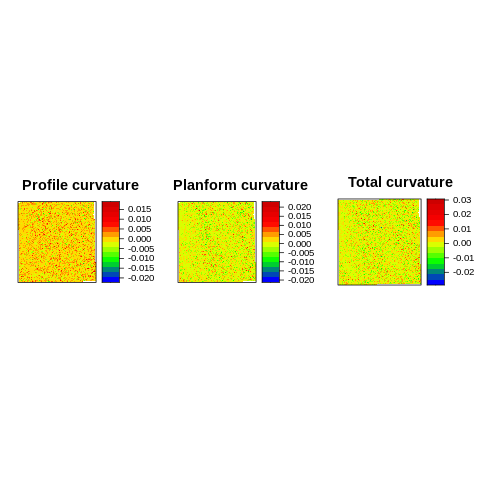

In [29]:
%%R
p1<-spplot(profile.crv,  col.regions=rgb.palette(100), main="Profile curvature")
p2<-spplot(planform.crv,  col.regions=rgb.palette(100), main="Planform curvature")
p3<-spplot(total.crv,  col.regions=rgb.palette(100),  main="Total curvature")
gridExtra::grid.arrange(p1, p2, p3, ncol=3)

### Flow Direction

Flow direction is a fundamental concept in hydrology and terrain analysis that refers to the direction in which water flows across the landscape. It plays a crucial role in understanding how water moves and accumulates in a watershed, influencing processes such as drainage, erosion, and sediment transport. Flow direction is determined by the topography of the terrain, where water naturally moves from higher elevations to lower elevations.

In geographic information systems (GIS) and hydrological modeling, flow direction is often represented using a raster grid where each cell is assigned a value indicating the direction in which water would flow from that cell. This grid is known as a flow direction grid. The most common approach to represent flow direction is by using the eight cardinal directions (N, NE, E, SE, S, SW, W, NW) or using numeric codes to indicate the direction.

Several methods are used to calculate flow direction:

D8 Flow Direction: This method assigns a unique direction to each of the eight neighboring cells surrounding the central cell. The flow direction is determined by identifying the steepest descent direction.

Dinf Flow Direction: Also known as the infinite slope method, this approach considers the angle of the steepest slope and assigns flow directions accordingly. It's based on the assumption that water flows in the direction of the steepest slope.

D4 Flow Direction: In this method, only four cardinal directions (N, E, S, W) are used to represent flow direction. It simplifies the flow direction calculation and is often used in coarse resolution models.

Flow direction is essential for a variety of applications:

Hydrological Modeling: Flow direction grids are used to simulate the movement of water in hydrological models, predicting runoff, streamflow, and flooding events.

Drainage Analysis: Flow direction is used to delineate watersheds, which are areas that contribute to a specific point in the landscape.

Erosion and Sediment Transport: Understanding flow direction helps predict how erosion and sediment transport will occur across the landscape.

Terrain Analysis: Flow direction is used in conjunction with other parameters to calculate aspects like flow accumulation and slope.

Flow direction is typically calculated from digital elevation models (DEMs) or digital terrain models (DTMs), and the results are often used in conjunction with flow accumulation, stream network generation, and other hydrological analysis operations to build a comprehensive understanding of the landscape's hydrological behavior.







In [30]:
%%R
FLD<- terrain(dem,		    #  raster DEM
	v="flowdir",             # flow direction
	unit='degrees')

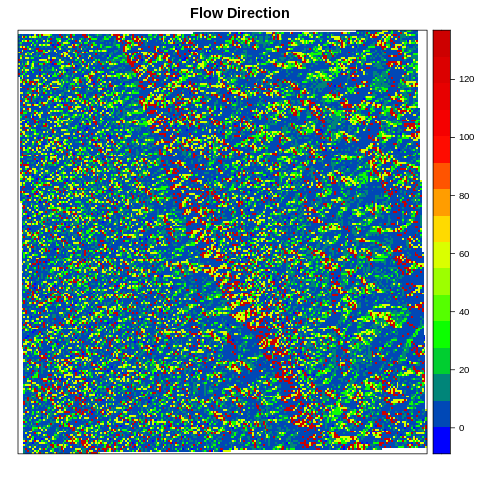

In [31]:
%%R
spplot(FLD,
       main= "Flow Direction",
      col.regions=rgb.palette(100))

### Landform classification

Landform classification based on morphology class typically refers to a category or classification assigned to a landform based on its shape, structure, and overall appearance. It's a way of categorizing landforms according to their physical characteristics and the processes that formed them. Morphologic classes are commonly used in the field of geomorphology, which is the study of the Earth's surface and the processes that shape it.

Morphologic classification based on the Topographic Position Index (TPI) involves categorizing landforms according to their elevation positions relative to the surrounding landscape. TPI measures the elevation difference between a central cell and its neighboring cells within a specified window. By using TPI values, you can create classes that correspond to different morphologic landform types.

Different types of landforms exhibit distinct morphological characteristics due to the geological, climatic, and hydrological processes that have shaped them over time. Geomorphologists often classify landforms into various morphologic classes to better understand the landscape's history and the forces that have contributed to its formation.

In [33]:
%%R
TPI_35<- tpiw(dem, w=35)		        # unit degree
SD <- sd(TPI_15[],na.rm=T)

# Make landform classes
#Morphologic class De Reu et al. 2013;  Weiss (2001)
landform <- classify(TPI_35, matrix(c(-Inf, -SD, 1,
                                    -SD, -SD/2, 2,
                                    -SD/2, 0, 3,
                                    0, SD/2, 4,
                                    SD/2, SD, 5,
                                    SD, Inf, 6),
                                    ncol = 3, byrow = T),
                                   right = T)

# Turn it into categorical raster
landform <- as.factor(landform)
rat <- levels(landform)[[1]]
rat[["landform"]] <- c('Valley', 'Lower Slope',
                        'Flat Area','Middle Slope',
                        'Upper Slope', 'Ridge')
levels(landform) <- rat
# Plot the classification
#x11(12,12)

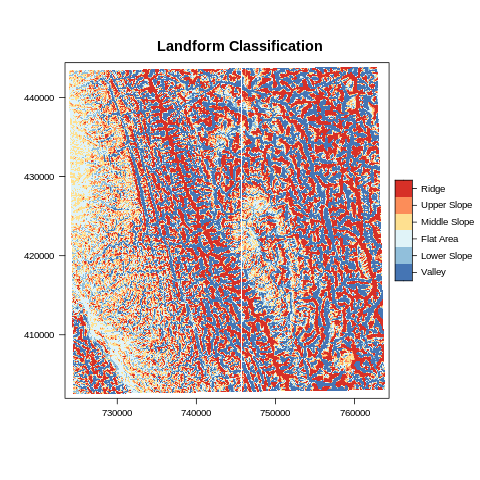

In [37]:
%%R
levelplot(landform, col.regions = rev(brewer.pal(6,'RdYlBu')),
          labels = rat$landcover,
          main = "Landform Classification",
          colorkey=list(labels=list(at=1:6, labels=rat[["landform"]])))

### Further Reading

1. [Elevation data processing and analysis in R](https://rpubs.com/ials2un/dem_analysis)

2. [Geomorphometric variables calculation](https://rpubs.com/ials3/dem1)

3. [Site Suitability/Terrain Analysis in R](https://geohaff.com/post/site-suitability/)